<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/tradevesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2024-12-06 15:33:43
-------------------
qualified stocks: 87
with latest results: 83
still star stocks: 41
-------------------
Initial Investment:  1.01 C
CY Investment:  1.14 C
Reserve:  1.70 K
Current:  1.22 C
-------------------
Today PnL: 19.95 K (0.16%)
Current PnL: -1.99 L (-1.75%)
CY Booked + Current PnL: 7.61 L (6.66%)
-------------------
Total profit:  8.29 L
Total loss:  -10.28 L
-------------------
Total Booked + Current PnL: 20.72 L (20.51%)
Total Booked PnL: 22.71 L (22.48%)
Curr Year Booked PnL: 9.60 L (7.87%)
Prev Year Booked PnL: 13.11 L (12.98%)
Est FTT:  1.94 C
Est FTT PnL: 72.25 L (59.22%)
-------------------
Est LTT:  2.45 C
Est LTT PnL: 1.23 C (101.07%)
Deployed:  1.01 C
Current:  1.22 C
CAGR/XIRR %: 17.61%
Row successfully appended and saved to data/myPortfolioDB.csv.


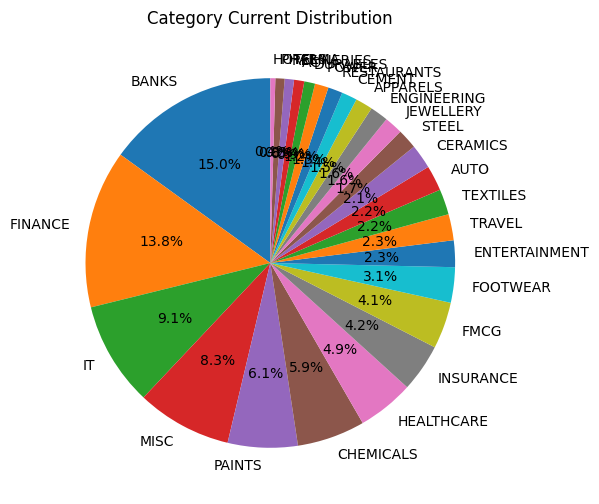

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'Close', 'FTT', 'Dev%_PE', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [4]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
77,TCS,4164.02,4445.50,4998.00,9.46,94.25,173374.0,10977.0,21550.0,-0.42,6.76,12.43,20.03,15.0,0.51,1.42,25.78,X40,BTT,IT
60,RELIANCE,1322.24,1311.55,1595.48,-1.21,55.75,99678.0,-812.0,21580.0,-0.79,-0.81,21.65,20.66,95.0,-0.04,0.82,8.58,X40,ATH,REFINERIES
47,LALPATHLAB,2519.90,3068.05,3689.00,-11.15,55.75,110450.0,19734.0,22355.0,2.77,21.75,20.24,46.39,26.0,0.88,0.91,53.46,X40N,NTT,HEALTHCARE
41,JIOFIN,320.24,338.90,387.00,1.72,79.31,167417.0,9218.0,23756.0,-0.76,5.83,14.19,20.85,85.0,0.39,1.37,46.01,XSP,BTT,FINANCE
55,PIDILITIND,2482.94,3162.25,3576.00,-7.06,59.77,183410.0,39399.0,23990.0,-0.93,27.36,13.08,44.02,15.0,1.64,1.50,26.60,X40,BTT,CHEMICALS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,CAMPUS,294.86,302.00,631.85,-1.79,57.47,171838.0,4063.0,187681.0,2.36,2.42,109.22,114.29,-31.0,0.02,1.41,40.79,XSP,ATH,FOOTWEAR
58,RBLBANK,230.61,174.66,388.00,-35.21,66.67,177455.0,-56845.0,216761.0,0.25,-24.26,122.15,68.25,-60.0,-0.26,1.45,14.82,XSP,NTT,BANKS
11,BANDHANBNK,217.54,176.27,400.00,-36.96,29.89,193368.0,-45273.0,245423.0,-0.66,-18.97,126.92,83.87,-24.0,-0.18,1.59,6.77,XSP,NTT,BANKS
75,TANLA,991.56,727.85,2007.31,-35.38,26.44,160855.0,-58280.0,282767.0,1.08,-26.60,175.79,102.44,-33.0,-0.21,1.32,7.43,AR,ATH,IT


In [5]:
# lower current allocation with minimal upside
tmp_df = df_portfolio_features[(df_portfolio_features['CurrAlloc%'] < 1) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
60,RELIANCE,1322.24,1311.55,1595.48,-1.21,55.75,99678.0,-812.0,21580.0,-0.79,-0.81,21.65,20.66,95.0,-0.04,0.82,8.58,X40,ATH,REFINERIES
47,LALPATHLAB,2519.90,3068.05,3689.00,-11.15,55.75,110450.0,19734.0,22355.0,2.77,21.75,20.24,46.39,26.0,0.88,0.91,53.46,X40N,NTT,HEALTHCARE
22,COLPAL,2884.00,2886.80,3808.06,17.88,35.63,101038.0,98.0,32241.0,-0.93,0.10,31.91,32.04,NaN,0.00,0.83,28.49,X40,ATH,FMCG
26,FINEORG,4771.46,5115.80,7168.71,-8.66,64.37,86969.0,5854.0,34901.0,0.33,7.22,40.13,50.24,-1.0,0.17,0.71,27.02,X40N,ATH,CHEMICALS
81,TTKPRESTIG,769.29,879.30,1149.24,28.88,60.92,115188.0,14411.0,35363.0,-2.33,14.30,30.70,49.39,16.0,0.41,0.94,32.31,X40N,ATH,DURABLES
15,BAYERCROP,4346.57,6037.95,8325.00,30.11,13.79,96607.0,27062.0,36595.0,-1.00,38.91,37.88,91.53,20.0,0.74,0.79,23.68,X40N,BTT,CHEMICALS
23,DABUR,523.35,523.80,735.00,-6.86,42.53,91665.0,79.0,36959.0,0.12,0.09,40.32,40.44,-3.0,0.00,0.75,6.78,X40,BTT,FMCG
17,BSOFT,628.85,608.10,844.81,5.41,82.76,106418.0,-3631.0,41429.0,0.26,-3.30,38.93,34.34,-40.0,-0.09,0.87,11.50,XR,ATH,IT
86,VIPIND,488.80,497.60,718.00,-324.79,75.86,97032.0,1716.0,42975.0,-0.78,1.80,44.29,46.89,-25.0,0.04,0.80,15.16,X40N,NTT,MISC
28,GLAND,1463.94,1813.25,2612.00,6.93,43.68,97916.0,18863.0,43132.0,-1.14,23.86,44.05,78.42,30.0,0.44,0.80,12.92,XR,NTT,PHARMA


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XSP') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
41,JIOFIN,320.24,338.90,387.00,1.72,79.31,167417.0,9218.0,23756.0,-0.76,5.83,14.19,20.85,85.0,0.39,1.37,46.01,XSP,BTT,FINANCE
83,UNIONBANK,123.87,128.91,163.00,-4.19,93.10,146571.0,5731.0,38753.0,0.87,4.07,26.44,31.59,-35.0,0.15,1.20,19.10,XSP,NTT,BANKS
7,ATULAUTO,624.44,648.15,844.00,-2.07,87.36,152963.0,5595.0,46225.0,-1.38,3.80,30.22,35.16,-64.0,0.12,1.25,36.25,XSP,NTT,AUTO
52,MEDANTA,1022.60,1175.30,1486.00,5.40,98.85,178646.0,23211.0,47234.0,1.51,14.93,26.44,45.32,60.0,0.49,1.46,27.77,XSP,NTT,HEALTHCARE
43,JPPOWER,18.73,19.22,26.20,-59.73,86.21,145553.0,3711.0,52865.0,-2.04,2.62,36.32,39.88,79.0,0.07,1.19,48.42,XSP,NTT,POWER
45,KANSAINER,299.63,277.85,340.00,-34.51,39.08,250065.0,-19602.0,55940.0,-0.02,-7.27,22.37,13.47,-28.0,-0.35,2.05,8.77,XSP,NTT,PAINTS
69,SHALBY,261.39,244.71,327.00,68.53,78.16,169584.0,-11559.0,57031.0,1.00,-6.38,33.63,25.10,-46.0,-0.20,1.39,16.20,XSP,NTT,HEALTHCARE
79,TITAGARH,1117.46,1190.00,1548.00,7.66,50.00,193970.0,11824.0,58346.0,0.30,6.49,30.08,38.53,-4.0,0.20,1.59,44.52,XSP,NTT,ENGINEERING
56,QUESS,711.66,701.00,986.00,-20.80,36.78,153519.0,-2335.0,62421.0,-0.76,-1.50,40.66,38.55,-28.0,-0.04,1.26,49.93,XSP,NTT,MISC
16,BERGEPAINT,558.54,480.45,680.00,-33.24,14.94,152303.0,-24754.0,63251.0,-0.51,-13.98,41.53,21.75,-16.0,-0.39,1.25,6.11,XSP,NTT,PAINTS


In [7]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.39
1,20,34.39
2,30,48.24


In [8]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XSP,38.05
X40,21.75
XR,16.28
X40N,15.25
AR,5.56
X200,1.57
SR,1.51


In [9]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,15.03,-4.07,60.02
FINANCE,13.83,-2.65,56.38
IT,9.11,-0.18,52.42
MISC,8.32,0.04,52.40
PAINTS,6.11,-10.37,43.03
CHEMICALS,5.93,0.05,65.02
HEALTHCARE,4.93,13.41,31.80
INSURANCE,4.19,5.41,45.62
FMCG,4.08,-4.83,43.36
